<a href="https://colab.research.google.com/github/gmrammohan15/EVA4/blob/master/S7-Assignment/S7_Modular_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/S7-Assignment/')
!ls /content/gdrive/My\ Drive/S7-Assignment

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [67]:
import network as net
import mnist_model as mnist
import eval

import importlib
importlib.reload(net)
importlib.reload(mnist)
importlib.reload(eval)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = net.Net().to(device)
 
SEED = 1
# CUDA?
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if use_cuda else dict(shuffle=True, batch_size=64)

mnist_model = mnist.MnistModel(model,dataloader_args)


cpu
CUDA Available? False


In [69]:
eval.show_summary(mnist_model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
              ReLU-2           [-1, 10, 28, 28]               0
       BatchNorm2d-3           [-1, 10, 28, 28]              20
            Conv2d-4           [-1, 20, 28, 28]           1,800
              ReLU-5           [-1, 20, 28, 28]               0
       BatchNorm2d-6           [-1, 20, 28, 28]              40
           Dropout-7           [-1, 20, 28, 28]               0
         MaxPool2d-8           [-1, 20, 14, 14]               0
            Conv2d-9           [-1, 10, 16, 16]             200
           Conv2d-10           [-1, 20, 16, 16]           1,800
             ReLU-11           [-1, 20, 16, 16]               0
      BatchNorm2d-12           [-1, 20, 16, 16]              40
          Dropout-13           [-1, 20, 16, 16]               0
        MaxPool2d-14             [-1, 2

In [70]:
eval.run_model(mnist_model,device)

  0%|          | 0/938 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.10419248789548874 Batch_id=937 Accuracy=89.71: 100%|██████████| 938/938 [02:12<00:00,  7.08it/s]
Loss=0.2034156322479248 Batch_id=0 Accuracy=98.44:   0%|          | 1/938 [00:00<02:14,  6.99it/s]


Test set: Average loss: 0.0918, Accuracy: 9726/10000 (97.26%)

EPOCH: 1


Loss=0.10165084898471832 Batch_id=937 Accuracy=97.17: 100%|██████████| 938/938 [02:02<00:00,  7.65it/s]
Loss=0.10655608028173447 Batch_id=0 Accuracy=100.00:   0%|          | 1/938 [00:00<02:04,  7.52it/s]


Test set: Average loss: 0.0564, Accuracy: 9833/10000 (98.33%)

EPOCH: 2


Loss=0.10736018419265747 Batch_id=937 Accuracy=97.79: 100%|██████████| 938/938 [02:01<00:00,  7.70it/s]
Loss=0.09328971803188324 Batch_id=0 Accuracy=100.00:   0%|          | 1/938 [00:00<01:59,  7.87it/s]


Test set: Average loss: 0.0440, Accuracy: 9866/10000 (98.66%)

EPOCH: 3


Loss=0.1683129072189331 Batch_id=937 Accuracy=97.98: 100%|██████████| 938/938 [02:00<00:00,  7.77it/s]
Loss=0.1578773856163025 Batch_id=0 Accuracy=96.88:   0%|          | 1/938 [00:00<02:00,  7.76it/s]


Test set: Average loss: 0.0448, Accuracy: 9857/10000 (98.57%)

EPOCH: 4


Loss=0.09733825922012329 Batch_id=937 Accuracy=98.08: 100%|██████████| 938/938 [01:58<00:00,  7.89it/s]
Loss=0.09399698674678802 Batch_id=0 Accuracy=100.00:   0%|          | 1/938 [00:00<01:53,  8.24it/s]


Test set: Average loss: 0.0396, Accuracy: 9871/10000 (98.71%)

EPOCH: 5


Loss=0.4014444351196289 Batch_id=937 Accuracy=98.29: 100%|██████████| 938/938 [02:01<00:00,  7.72it/s]
Loss=0.11316706240177155 Batch_id=0 Accuracy=98.44:   0%|          | 1/938 [00:00<02:00,  7.76it/s]


Test set: Average loss: 0.0273, Accuracy: 9910/10000 (99.10%)

EPOCH: 6


Loss=0.12933698296546936 Batch_id=937 Accuracy=98.39: 100%|██████████| 938/938 [02:02<00:00,  7.63it/s]
Loss=0.11431777477264404 Batch_id=0 Accuracy=98.44:   0%|          | 1/938 [00:00<02:01,  7.71it/s]


Test set: Average loss: 0.0338, Accuracy: 9895/10000 (98.95%)

EPOCH: 7


Loss=0.07376924902200699 Batch_id=937 Accuracy=98.43: 100%|██████████| 938/938 [02:02<00:00,  7.67it/s]
Loss=0.08326035737991333 Batch_id=0 Accuracy=100.00:   0%|          | 1/938 [00:00<02:02,  7.65it/s]


Test set: Average loss: 0.0289, Accuracy: 9913/10000 (99.13%)

EPOCH: 8


Loss=0.07117859274148941 Batch_id=937 Accuracy=98.37: 100%|██████████| 938/938 [01:58<00:00,  7.90it/s]
Loss=0.0849919319152832 Batch_id=0 Accuracy=100.00:   0%|          | 1/938 [00:00<01:53,  8.27it/s]


Test set: Average loss: 0.0329, Accuracy: 9897/10000 (98.97%)

EPOCH: 9


Loss=0.10197077691555023 Batch_id=937 Accuracy=98.47: 100%|██████████| 938/938 [01:59<00:00,  7.86it/s]
Loss=0.07227706164121628 Batch_id=0 Accuracy=100.00:   0%|          | 1/938 [00:00<02:04,  7.51it/s]


Test set: Average loss: 0.0285, Accuracy: 9912/10000 (99.12%)

EPOCH: 10


Loss=0.20381972193717957 Batch_id=937 Accuracy=98.54: 100%|██████████| 938/938 [01:59<00:00,  7.88it/s]
Loss=0.14129768311977386 Batch_id=0 Accuracy=95.31:   0%|          | 1/938 [00:00<02:02,  7.66it/s]


Test set: Average loss: 0.0249, Accuracy: 9916/10000 (99.16%)

EPOCH: 11


Loss=0.07814120501279831 Batch_id=937 Accuracy=98.55: 100%|██████████| 938/938 [01:57<00:00,  7.99it/s]
Loss=0.1354382485151291 Batch_id=0 Accuracy=98.44:   0%|          | 1/938 [00:00<01:57,  8.00it/s]


Test set: Average loss: 0.0292, Accuracy: 9909/10000 (99.09%)

EPOCH: 12


Loss=0.08627974987030029 Batch_id=937 Accuracy=98.52: 100%|██████████| 938/938 [01:57<00:00,  7.98it/s]
Loss=0.18476852774620056 Batch_id=0 Accuracy=98.44:   0%|          | 1/938 [00:00<01:53,  8.27it/s]


Test set: Average loss: 0.0259, Accuracy: 9924/10000 (99.24%)

EPOCH: 13


Loss=0.07390298694372177 Batch_id=937 Accuracy=98.57: 100%|██████████| 938/938 [01:59<00:00,  7.87it/s]
Loss=0.0785907506942749 Batch_id=0 Accuracy=100.00:   0%|          | 1/938 [00:00<02:15,  6.92it/s]


Test set: Average loss: 0.0272, Accuracy: 9910/10000 (99.10%)

EPOCH: 14


Loss=0.3011334538459778 Batch_id=937 Accuracy=98.56: 100%|██████████| 938/938 [02:00<00:00,  7.78it/s]
Loss=0.1367529332637787 Batch_id=0 Accuracy=98.44:   0%|          | 1/938 [00:00<02:15,  6.93it/s]


Test set: Average loss: 0.0288, Accuracy: 9919/10000 (99.19%)

EPOCH: 15


Loss=0.26973864436149597 Batch_id=937 Accuracy=98.59: 100%|██████████| 938/938 [01:58<00:00,  7.92it/s]
Loss=0.14258486032485962 Batch_id=0 Accuracy=98.44:   0%|          | 1/938 [00:00<01:58,  7.92it/s]


Test set: Average loss: 0.0332, Accuracy: 9898/10000 (98.98%)

EPOCH: 16


Loss=0.1336052417755127 Batch_id=937 Accuracy=98.56: 100%|██████████| 938/938 [01:59<00:00,  7.86it/s]
Loss=0.12301000952720642 Batch_id=0 Accuracy=98.44:   0%|          | 1/938 [00:00<01:51,  8.39it/s]


Test set: Average loss: 0.0259, Accuracy: 9918/10000 (99.18%)

EPOCH: 17


Loss=0.07217768579721451 Batch_id=937 Accuracy=98.72: 100%|██████████| 938/938 [02:00<00:00,  7.81it/s]
Loss=0.07607487589120865 Batch_id=0 Accuracy=100.00:   0%|          | 1/938 [00:00<01:55,  8.12it/s]


Test set: Average loss: 0.0271, Accuracy: 9911/10000 (99.11%)

EPOCH: 18


Loss=0.38399091362953186 Batch_id=937 Accuracy=98.64: 100%|██████████| 938/938 [01:58<00:00,  7.95it/s]
Loss=0.08683285117149353 Batch_id=0 Accuracy=100.00:   0%|          | 1/938 [00:00<02:12,  7.08it/s]


Test set: Average loss: 0.0247, Accuracy: 9926/10000 (99.26%)

EPOCH: 19


Loss=0.15905459225177765 Batch_id=937 Accuracy=98.61: 100%|██████████| 938/938 [02:06<00:00,  7.41it/s]
Loss=0.0754290521144867 Batch_id=0 Accuracy=100.00:   0%|          | 1/938 [00:00<02:07,  7.32it/s]


Test set: Average loss: 0.0278, Accuracy: 9901/10000 (99.01%)

EPOCH: 20


Loss=0.1012706309556961 Batch_id=937 Accuracy=98.64: 100%|██████████| 938/938 [02:05<00:00,  7.49it/s]
Loss=0.12061930447816849 Batch_id=0 Accuracy=98.44:   0%|          | 1/938 [00:00<01:57,  7.95it/s]


Test set: Average loss: 0.0209, Accuracy: 9938/10000 (99.38%)

EPOCH: 21


Loss=0.07897873222827911 Batch_id=937 Accuracy=98.70: 100%|██████████| 938/938 [02:04<00:00,  7.52it/s]
Loss=0.07127297669649124 Batch_id=0 Accuracy=100.00:   0%|          | 1/938 [00:00<02:03,  7.56it/s]


Test set: Average loss: 0.0241, Accuracy: 9918/10000 (99.18%)

EPOCH: 22


Loss=0.07434084266424179 Batch_id=937 Accuracy=98.68: 100%|██████████| 938/938 [02:03<00:00,  7.59it/s]
Loss=0.08416468650102615 Batch_id=0 Accuracy=98.44:   0%|          | 1/938 [00:00<02:06,  7.42it/s]


Test set: Average loss: 0.0254, Accuracy: 9916/10000 (99.16%)

EPOCH: 23


Loss=0.07456139475107193 Batch_id=937 Accuracy=98.66: 100%|██████████| 938/938 [02:02<00:00,  7.66it/s]
Loss=0.11442997306585312 Batch_id=0 Accuracy=96.88:   0%|          | 1/938 [00:00<02:01,  7.68it/s]


Test set: Average loss: 0.0259, Accuracy: 9908/10000 (99.08%)

EPOCH: 24


Loss=0.14497336745262146 Batch_id=937 Accuracy=98.69: 100%|██████████| 938/938 [02:03<00:00,  7.61it/s]
Loss=0.09129708260297775 Batch_id=0 Accuracy=98.44:   0%|          | 1/938 [00:00<02:09,  7.21it/s]


Test set: Average loss: 0.0238, Accuracy: 9917/10000 (99.17%)

EPOCH: 25


Loss=0.06893350183963776 Batch_id=937 Accuracy=98.66: 100%|██████████| 938/938 [02:02<00:00,  7.64it/s]
Loss=0.126175656914711 Batch_id=0 Accuracy=96.88:   0%|          | 1/938 [00:00<02:07,  7.33it/s]


Test set: Average loss: 0.0233, Accuracy: 9926/10000 (99.26%)

EPOCH: 26


Loss=0.0721961259841919 Batch_id=937 Accuracy=98.72: 100%|██████████| 938/938 [02:02<00:00,  7.63it/s]
Loss=0.08788371086120605 Batch_id=0 Accuracy=100.00:   0%|          | 1/938 [00:00<02:05,  7.49it/s]


Test set: Average loss: 0.0283, Accuracy: 9918/10000 (99.18%)

EPOCH: 27


Loss=0.08397103101015091 Batch_id=937 Accuracy=98.68: 100%|██████████| 938/938 [02:03<00:00,  7.62it/s]
Loss=0.09359263628721237 Batch_id=0 Accuracy=100.00:   0%|          | 1/938 [00:00<02:05,  7.45it/s]


Test set: Average loss: 0.0225, Accuracy: 9938/10000 (99.38%)

EPOCH: 28


Loss=0.09093288332223892 Batch_id=937 Accuracy=98.69: 100%|██████████| 938/938 [02:01<00:00,  7.75it/s]
Loss=0.15825526416301727 Batch_id=0 Accuracy=98.44:   0%|          | 1/938 [00:00<01:57,  7.94it/s]


Test set: Average loss: 0.0254, Accuracy: 9914/10000 (99.14%)

EPOCH: 29


Loss=0.13723108172416687 Batch_id=937 Accuracy=98.74: 100%|██████████| 938/938 [01:58<00:00,  7.88it/s]
Loss=0.14894890785217285 Batch_id=0 Accuracy=98.44:   0%|          | 1/938 [00:00<02:05,  7.49it/s]


Test set: Average loss: 0.0289, Accuracy: 9905/10000 (99.05%)

EPOCH: 30


Loss=0.07760177552700043 Batch_id=937 Accuracy=98.66: 100%|██████████| 938/938 [01:59<00:00,  7.84it/s]
Loss=0.08144839107990265 Batch_id=0 Accuracy=98.44:   0%|          | 1/938 [00:00<02:01,  7.72it/s]


Test set: Average loss: 0.0247, Accuracy: 9923/10000 (99.23%)

EPOCH: 31


Loss=0.08048766851425171 Batch_id=937 Accuracy=98.82: 100%|██████████| 938/938 [01:59<00:00,  7.86it/s]
Loss=0.1721935272216797 Batch_id=0 Accuracy=96.88:   0%|          | 1/938 [00:00<02:06,  7.43it/s]


Test set: Average loss: 0.0302, Accuracy: 9914/10000 (99.14%)

EPOCH: 32


Loss=0.08706079423427582 Batch_id=937 Accuracy=98.85: 100%|██████████| 938/938 [02:00<00:00,  7.80it/s]
Loss=0.08204718679189682 Batch_id=0 Accuracy=100.00:   0%|          | 1/938 [00:00<02:03,  7.57it/s]


Test set: Average loss: 0.0234, Accuracy: 9935/10000 (99.35%)

EPOCH: 33


Loss=0.08759461343288422 Batch_id=937 Accuracy=98.72: 100%|██████████| 938/938 [02:00<00:00,  7.79it/s]
Loss=0.19064202904701233 Batch_id=0 Accuracy=93.75:   0%|          | 1/938 [00:00<02:11,  7.11it/s]


Test set: Average loss: 0.0284, Accuracy: 9911/10000 (99.11%)

EPOCH: 34


Loss=0.07192647457122803 Batch_id=937 Accuracy=98.77: 100%|██████████| 938/938 [01:59<00:00,  7.87it/s]
Loss=0.08734690397977829 Batch_id=0 Accuracy=100.00:   0%|          | 1/938 [00:00<02:00,  7.75it/s]


Test set: Average loss: 0.0212, Accuracy: 9929/10000 (99.29%)

EPOCH: 35


Loss=0.07253281772136688 Batch_id=937 Accuracy=98.67: 100%|██████████| 938/938 [02:00<00:00,  7.81it/s]
Loss=0.07183218002319336 Batch_id=0 Accuracy=100.00:   0%|          | 1/938 [00:00<02:11,  7.11it/s]


Test set: Average loss: 0.0228, Accuracy: 9929/10000 (99.29%)

EPOCH: 36


Loss=0.09034267067909241 Batch_id=937 Accuracy=98.67: 100%|██████████| 938/938 [01:59<00:00,  7.85it/s]
Loss=0.06930315494537354 Batch_id=0 Accuracy=100.00:   0%|          | 1/938 [00:00<02:02,  7.66it/s]


Test set: Average loss: 0.0268, Accuracy: 9905/10000 (99.05%)

EPOCH: 37


Loss=0.0956728383898735 Batch_id=937 Accuracy=98.77: 100%|██████████| 938/938 [02:00<00:00,  7.80it/s]
Loss=0.08735696226358414 Batch_id=0 Accuracy=100.00:   0%|          | 1/938 [00:00<01:58,  7.90it/s]


Test set: Average loss: 0.0313, Accuracy: 9899/10000 (98.99%)

EPOCH: 38


Loss=0.08858537673950195 Batch_id=937 Accuracy=98.70: 100%|██████████| 938/938 [02:01<00:00,  7.75it/s]
Loss=0.10016252100467682 Batch_id=0 Accuracy=98.44:   0%|          | 1/938 [00:00<02:06,  7.41it/s]


Test set: Average loss: 0.0188, Accuracy: 9938/10000 (99.38%)

EPOCH: 39


Loss=0.06601429730653763 Batch_id=937 Accuracy=98.68: 100%|██████████| 938/938 [02:00<00:00,  7.76it/s]



Test set: Average loss: 0.0270, Accuracy: 9913/10000 (99.13%)



In [0]:
def find_actual_pred_map(model, num=25):
  images=[]
  target_list=[]
  pred_list=[]
  count=0
  use_cuda = torch.cuda.is_available()
  device = torch.device("cuda" if use_cuda else "cpu")
  with torch.no_grad():
    for data, target in mnist_model.m_test_loader:
      data, target = data.to(device), target.to(device)
      output = mnist_model.m_model(data)
      pred = output.argmax(dim=1, keepdim=True).view_as(target)
      for d , t , p in zip(data, target, pred):
        if t!=p:
          d = d.cpu().numpy()
          t = t.cpu().numpy()
          p = p.cpu().numpy()
          d = (d*0.3081)+0.1307
          images.append(d)
          target_list.append(t)
          pred_list.append(p)
          count+=1
        if count == num:
          return images, target_list, pred_list

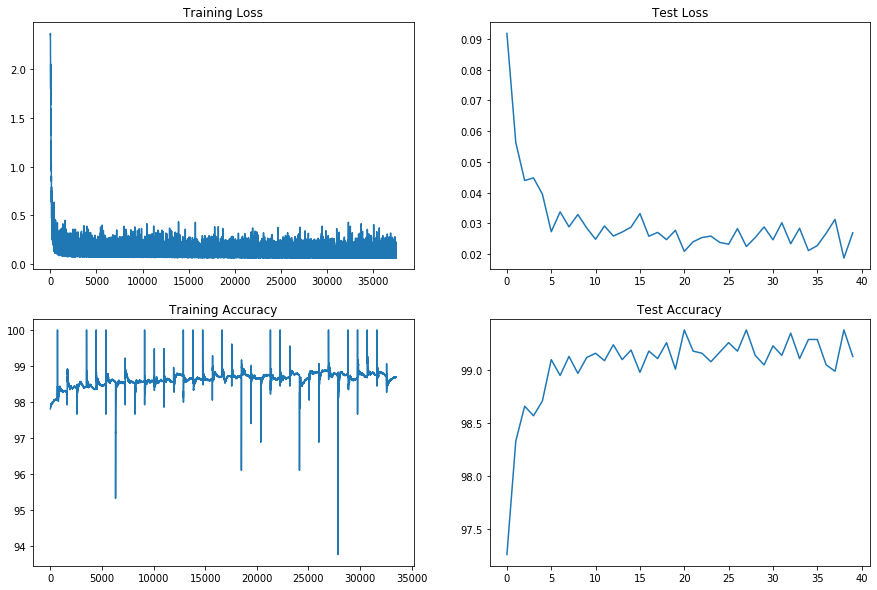

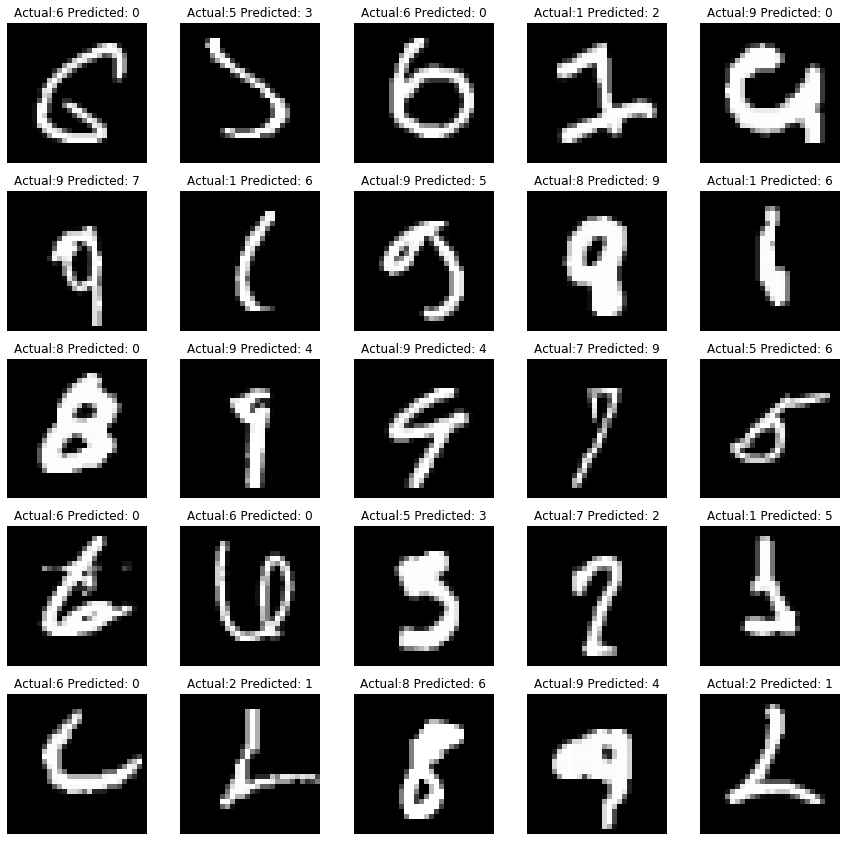

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
images, targ, pred  = find_actual_pred_map(mnist_model)

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(mnist_model.m_train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(mnist_model.m_train_acc[4000:])
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(mnist_model.m_test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(mnist_model.m_test_acc)
axs[1, 1].set_title("Test Accuracy")

fig = plt.figure(figsize=(15, ((25//5)+1)*3))

for i in range(0, 25):
  ax=fig.add_subplot((25//5)+1, 5, i+1)
  ax.imshow(np.rollaxis(images[i], 0, 3).squeeze(), cmap='gray')
  ax.axis('off')
  ax.set_title("Actual:"+str(targ[i])+" Predicted: "+str(pred[i]))


plt.show()
